# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import scipy.stats as stat
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Import Data

In [2]:
dataset = pd.read_csv('PD Model/Data/Data.csv')

## Explore Data

In [3]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
dataset.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
dataset.columns.values
# Displays all column names.

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [6]:
dataset.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.
# There is no missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  Y       300

In [7]:
dataset.isnull().sum()
# Double check whether there is missing values or not.
# Confirmed no missing values

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [8]:
dataset.describe()
# Displays summary statistics

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The data looks good, no obvious issues. The mean, min and max of all variables are reasonable. 

## Preprocessing Variables

Generate independent variables:

In past 6 months:

Average Payment Delays = Average of payment delays from April to September, 2005
Average Bill Statment = Average amount of bill statement from April to September, 2005
Average Previous Payment = Amount of previous payment from April to September, 2005

Bill_to_Credit = Average Bill Statment / Amount of the given credit
PrePay_to_Credit = Average Previous Payment / Amount of the given credit

In past 3 months:

Average Payment Delays 3mon = Average of payment delays from July to September, 2005
Average Bill Statment 3mon= Average amount of bill statement from July to September, 2005
Average Previous Payment 3mon= Amount of previous payment from July to September, 2005

Bill_to_Credit 3mon= Average Bill Statment 3mon/ Amount of the given credit
PrePay_to_Credit 3mon= Average Previous Payment 3mon/ Amount of the given credit

In [9]:
# Generate variables for 6 months
dataset['Avg_pay_delay'] = sum([dataset['X6'], dataset['X7'],dataset['X8'],dataset['X9'],dataset['X10'],dataset['X11']]) / 6
dataset['Avg_bill_statment'] = sum([dataset['X12'], dataset['X13'],dataset['X14'],dataset['X15'],dataset['X16'],dataset['X17']]) / 6
dataset['Avg_Pre_Pay'] = sum([dataset['X18'], dataset['X19'],dataset['X20'],dataset['X21'],dataset['X22'],dataset['X23']]) / 6

dataset['Bill_to_Credit'] = dataset['Avg_bill_statment'] / dataset['X1']
dataset['PrePay_to_Credit'] = dataset['Avg_Pre_Pay'] / dataset['X1']

# Generate variables for 3 months
dataset['Avg_pay_delay_3m'] = sum([dataset['X6'], dataset['X7'],dataset['X8']]) / 3
dataset['Avg_bill_statment_3m'] = sum([dataset['X12'], dataset['X13'],dataset['X14']]) / 3
dataset['Avg_Pre_Pay_3m'] = sum([dataset['X18'], dataset['X19'],dataset['X20']]) / 3

dataset['Bill_to_Credit_3m'] = dataset['Avg_bill_statment_3m'] / dataset['X1']
dataset['PrePay_to_Credit_3m'] = dataset['Avg_Pre_Pay_3m'] / dataset['X1']

In [10]:
dataset.describe()
# Displays summary statistics

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Avg_pay_delay,Avg_bill_statment,Avg_Pre_Pay,Bill_to_Credit,PrePay_to_Credit,Avg_pay_delay_3m,Avg_bill_statment_3m,Avg_Pre_Pay_3m,Bill_to_Credit_3m,PrePay_to_Credit_3m
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,-0.182439,44976.945200,5275.232094,0.373048,0.038909,-0.105556,49138.520289,5603.475167,0.409031,0.042631
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,0.982176,63260.721860,10137.946323,0.351890,0.052625,1.037028,69560.379812,13658.079159,0.390659,0.070146
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-56043.166667,0.000000,-0.232590,0.000000,-2.000000,-47043.000000,0.000000,-0.465180,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.833333,4781.333333,1113.291667,0.029997,0.011286,-1.000000,4475.750000,1208.666667,0.027242,0.010656
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,21051.833333,2397.166667,0.284834,0.026111,0.000000,22310.166667,2347.000000,0.308655,0.026923
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,57104.416667,5583.916667,0.687929,0.043859,0.000000,63862.166667,5469.750000,0.781863,0.044848
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,6.000000,877313.833333,627344.333333,5.364308,2.427723,7.000000,827820.666667,992688.666667,6.075733,4.272346


## Splitting Data

In [11]:
X = dataset.loc[:, ['X2', 'X3', 'X4', 'X5', 'Avg_pay_delay', 'Bill_to_Credit', 'PrePay_to_Credit', 'Avg_pay_delay_3m', 'Bill_to_Credit_3m', 'PrePay_to_Credit_3m']]
y = dataset.loc[:, ['Y']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# PD Model Estimation

## Build a Logistic Regression Model with P-Values

In [13]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.
class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [14]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [15]:
reg.fit(X_train, y_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
feature_name = X_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.880686
1,X2,-0.139835
2,X3,-0.014370
3,X4,-0.108345
4,X5,0.004303
5,Avg_pay_delay,-0.040177
6,Bill_to_Credit,0.855312
7,PrePay_to_Credit,-1.334849
8,Avg_pay_delay_3m,0.794608
9,Bill_to_Credit_3m,-0.984339


In [17]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [18]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [19]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [20]:
summary_table
summary_table.to_csv('PD Model/Outputs/EstimationResults.csv')

## Drop Insignificant Variables

In [21]:
## X3, Avg_pay_delay, and PrePay_to_Credit_3m are insignificant, as such, will remove them from the model
X = dataset.loc[:, ['X2', 'X4', 'X5', 'Bill_to_Credit', 'PrePay_to_Credit', 'Avg_pay_delay_3m', 'Bill_to_Credit_3m']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
reg.fit(X_train, y_train)

feature_name = X_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.

p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature name,Coefficients,p_values
0,Intercept,-0.930554,NaN
1,X2,-0.134333,2.224666e-06
2,X4,-0.102017,5.925327e-05
3,X5,0.004494,2.088575e-04
4,Bill_to_Credit,0.743688,8.047837e-05
5,PrePay_to_Credit,-1.557327,1.351222e-04
6,Avg_pay_delay_3m,0.766735,0.000000e+00
7,Bill_to_Credit_3m,-0.919783,3.852898e-08


In [22]:
summary_table.to_csv('PD Model/Outputs/EstimationResults_revised.csv')

## Feature Importance

            Features  Importances
5   Avg_pay_delay_3m     0.766735
3     Bill_to_Credit     0.743688
2                 X5     0.004494
1                 X4    -0.102017
0                 X2    -0.134333
6  Bill_to_Credit_3m    -0.919783
4   PrePay_to_Credit    -1.557327


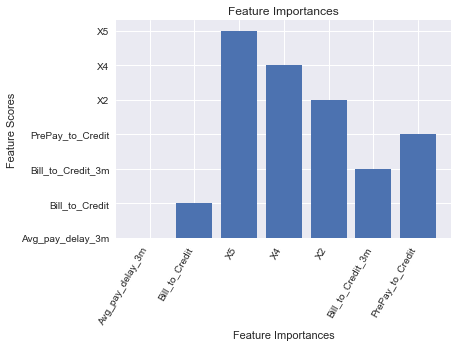

In [23]:
importances = reg.coef_[0]
imp = pd.DataFrame()
imp['Features'] = feature_name
# Get Feature name
imp['Importances'] = importances
# Get Feature importance
imp = imp.sort_values('Importances', ascending = False)
print(imp)
imp.to_csv('PD Model/Outputs/Feature_Importance.csv')
# Export feature importance

# plot feature importance
sns.set()
plt.bar([x for x in range(len(importances))], imp['Features'])
plt.xlabel('Feature Importances')
# We name the x-axis "Feature Importances".
plt.ylabel('Feature Scores')
# We name the Y-axis "Feature Scores".
plt.title('Feature Importances')
# We name the graph "Feature Importances".
plt.xticks([x for x in range(len(importances))], imp['Features'], rotation=60, horizontalalignment='right')
plt.savefig('PD Model/Plots/Importance.png')
plt.show()

In [24]:
pickle.dump(reg, open('PD Model/Outputs/pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

## Out-of-sample validation (test)

In [25]:
y_hat_test = reg.model.predict(X_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [26]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
y_hat_test_proba = reg.model.predict_proba(X_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [28]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.86794362, 0.13205638],
       [0.78555572, 0.21444428],
       [0.48366295, 0.51633705],
       ...,
       [0.54775669, 0.45224331],
       [0.75583784, 0.24416216],
       [0.75897634, 0.24102366]])

In [29]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.13205638, 0.21444428, 0.51633705, ..., 0.45224331, 0.24416216,
       0.24102366])

In [30]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [31]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.13205638, 0.21444428, 0.51633705, ..., 0.45224331, 0.24416216,
       0.24102366])

In [32]:
loan_data_targets_test_temp = y_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.
df_actual_predicted_probs.columns = ['y_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = X_test.index
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.head()
df_actual_predicted_probs.to_csv('PD Model/Outputs/Out_of_Sample_Predictions.csv')

## Accuracy and Area under the Curve

In [33]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [34]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,4695,1
1,1300,4


In [35]:
pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.782500,0.000167
1,0.216667,0.000667


In [36]:
(pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.7831666666666667

In [37]:
roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.00000000e+00, 0.00000000e+00, 2.12947189e-04, ...,
        9.98083475e-01, 9.98083475e-01, 1.00000000e+00]),
 array([7.66871166e-04, 1.53374233e-03, 1.53374233e-03, ...,
        9.99233129e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.98389609, 0.98122331, 0.97811239, ..., 0.04158303, 0.04145816,
        0.0165336 ]))

In [38]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

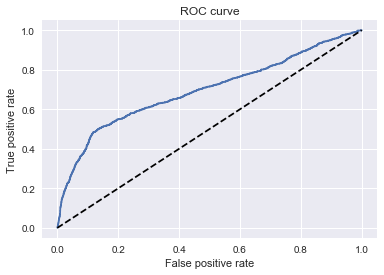

In [39]:
sns.set()
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".
plt.savefig('PD Model/Plots/ROC.png')
# Save the ROC curve figure

In [40]:
AUROC = roc_auc_score(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.695136785908383

## Gini and Kolmogorov-Smirnov

In [41]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['y_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['y_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [42]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['y_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['y_test'].sum())
# We calculate the cumulative percentage of 'bad'.

E:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


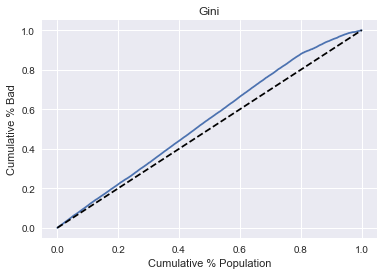

In [43]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".
plt.savefig('PD Model/Plots/Gini.png')
# Save the Gini figure

In [44]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.39027357181676603

E:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


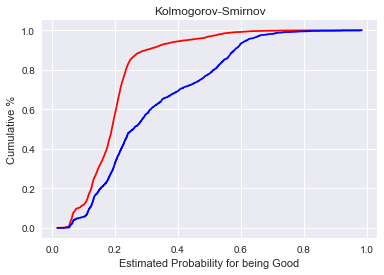

In [45]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".
plt.savefig('PD Model/Plots/KS.png')
# Save the KS curve figure

In [46]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.36622735966388315

## Cross Validation

In [47]:
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
# Cross Validaiton for 10 times
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()
# Print Accuracy Scores

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Cross-Validation Accuracy Scores [0.79883382 0.80383174 0.81083333 0.80833333 0.79875    0.8025
 0.81875    0.80333333 0.8036682  0.80241767]


(0.79875, 0.8051251425130456, 0.81875)

In [48]:
scores = cross_val_score(log_reg, X_train, y_train, scoring='roc_auc', cv=10)
# Cross Validaiton for 10 times
print('Cross-Validation AUC', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()
# Print AUC Scores

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Cross-Validation AUC [0.66510144 0.68547651 0.66691455 0.66299136 0.69382813 0.67302994
 0.72191092 0.69752269 0.68210286 0.67617623]


(0.6629913647824213, 0.6825054625793843, 0.7219109225001029)